# Modelling Customers Feedback on Product (EDA notebook)

Product size recommendation and fit prediction are critical in order to improve customers’ shopping experiences and to reduce product return rates. However, modeling customers’ fit feedback is challenging due to its subtle semantics, arising from the subjective evaluation of products and imbalanced label distribution (most of the feedbacks are "Fit").

As a data scientist your aim is to predict the customer satisfaction. This dataset contain imformation regarding clothes. Each observation is different fitting size with various features.

## About dataset :

The dataset has details of 82790 userId with the following 11 features.

|Features|Description|
|-----|-----|
| bra_size|integer value|
| cup_size| size of cloth|
| fit     |Target variable (fit/large/small)|
| Hips    | Size of Hips |
| item id | Id_number |
| length  |Length of cloth|
| size    |size of cloth|
| userID | user id of cutomer|



In [1]:
#importing all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style # for styling the graphss
# style.available (to know the available list of styles)
style.use('ggplot') # chosen style
plt.rc('xtick',labelsize=13) # to globally set the tick size
plt.rc('ytick',labelsize=13) # to globally set the tick size
# To print multiple outputs together
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Change column display number during print
pd.set_option('display.max_columns', 500)
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
# To display float with 2 decimal, avoid scientific printing
pd.options.display.float_format = '{:.2f}'.format
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the data
path='./data/file.json'
df=pd.read_json(path,lines=True)
df

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.00,7,5.00,d,38.00,34.00,new,36,5ft 6in,Emily,just right,small,991571,nan,NaN,NaN,NaN
1,123373,31.00,13,3.00,b,30.00,36.00,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,nan,NaN,NaN,NaN
2,123373,30.00,7,2.00,b,nan,32.00,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.00,NaN,NaN,NaN
3,123373,nan,21,5.00,dd/e,nan,nan,new,NaN,NaN,alexmeyer626,just right,fit,875643,nan,NaN,NaN,NaN
4,123373,nan,18,5.00,b,nan,36.00,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,nan,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82785,807722,nan,8,4.00,b,nan,36.00,outerwear,NaN,5ft 8in,Jennifer,just right,fit,727820,8.50,average,Cute jacket!,Cute jacket!
82786,807722,nan,12,5.00,ddd/f,nan,34.00,outerwear,NaN,5ft 5in,Kelli,slightly long,small,197040,nan,NaN,It's a beautiful jacket.,It's a beautiful jacket. I love how it's knit ...
82787,807722,nan,12,5.00,dddd/g,36.00,32.00,outerwear,NaN,5ft 4in,elacount,just right,fit,102493,nan,NaN,I love this blazer. It is,I love this blazer. It is a great office piece...
82788,807722,nan,12,4.00,NaN,nan,nan,outerwear,NaN,5ft 3in,jennaklinner,just right,fit,756491,nan,NaN,I love this blazer!! I wo,I love this blazer!! I wore it yesterday and g...


In [3]:
#Check missing values
# Function to identify the number of missing values in every feature
def missing_data(dataset):
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
    
    
missing_data = missing_data(df)
print(missing_data)

                Total  Percent
waist           79908     0.97
bust            70936     0.86
shoe width      64183     0.78
shoe size       54875     0.66
hips            26726     0.32
review_summary   6725     0.08
review_text      6725     0.08
cup size         6255     0.08
bra size         6018     0.07
height           1107     0.01
quality            68     0.00
length             35     0.00
user_name           0     0.00
category            0     0.00
fit                 0     0.00
size                0     0.00
user_id             0     0.00
item_id             0     0.00


In [4]:
#Creating a new data frame
df1=df[['review_summary','cup size','bra size','height','quality','length','fit','size','category']]
df1

,review_summary,cup size,bra size,height,quality,length,fit,size,category
0,NaN,d,34.00,5ft 6in,5.00,just right,small,7,new
1,NaN,b,36.00,5ft 2in,3.00,just right,small,13,new
2,NaN,b,32.00,5ft 7in,2.00,slightly long,small,7,new
3,NaN,dd/e,nan,NaN,5.00,just right,fit,21,new
4,NaN,b,36.00,5ft 2in,5.00,slightly long,small,18,new
...,...,...,...,...,...,...,...,...,...
82785,Cute jacket!,b,36.00,5ft 8in,4.00,just right,fit,8,outerwear
82786,It's a beautiful jacket.,ddd/f,34.00,5ft 5in,5.00,slightly long,small,12,outerwear
82787,I love this blazer. It is,dddd/g,32.00,5ft 4in,5.00,just right,fit,12,outerwear
82788,I love this blazer!! I wo,NaN,nan,5ft 3in,4.00,just right,fit,12,outerwear


In [7]:
#Lets Create wordcloud of review summary based on category
cat_review=df1[['review_summary','category']]
cat_review.dropna(inplace=True)
cat_review['category'].value_counts()

tops         20364
dresses      18648
bottoms      15266
new          14765
outerwear     4223
sale          2524
wedding        275
Name: category, dtype: int64

In [24]:
#pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [8]:
#pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [8]:
import nltk
nltk.download('stopwords')
STOPWORDS = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [13]:
#lets check using wordcloud what people say for a particular item category
A=cat_review[cat_review['category']=='tops']
B=A['review_summary'].astype(str)
B

38581    It's so soft and fits gre
38582         I love this but.....
38583    Love this sweatshirt just
38584    As queen of the groutfit,
38585    This is my new favorite s
                   ...            
59130                    Gorgeous!
59131    Arm holes seem to be a bi
59132     And absolutely beautiful
59133    It's a very comfortable s
59134                It's perfect.
Name: review_summary, Length: 20364, dtype: object

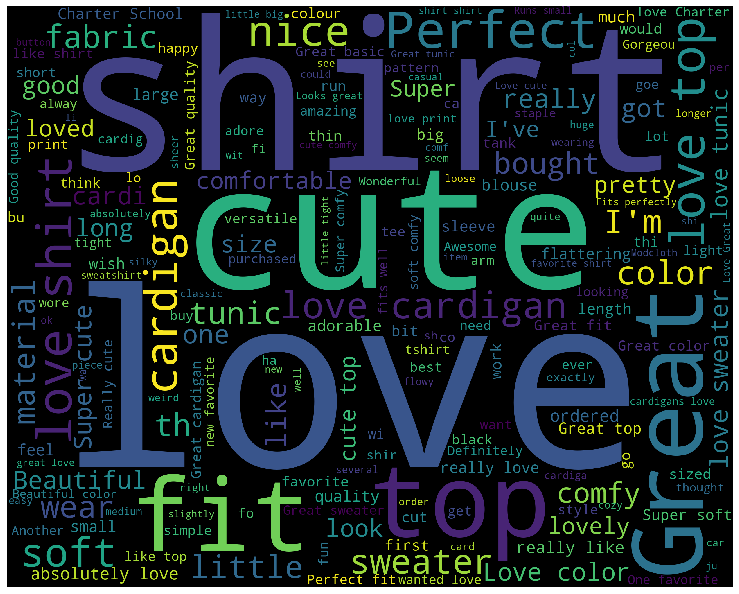

In [18]:
#Creating word cloud for tops
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    

wordcloud_draw(B,'black')

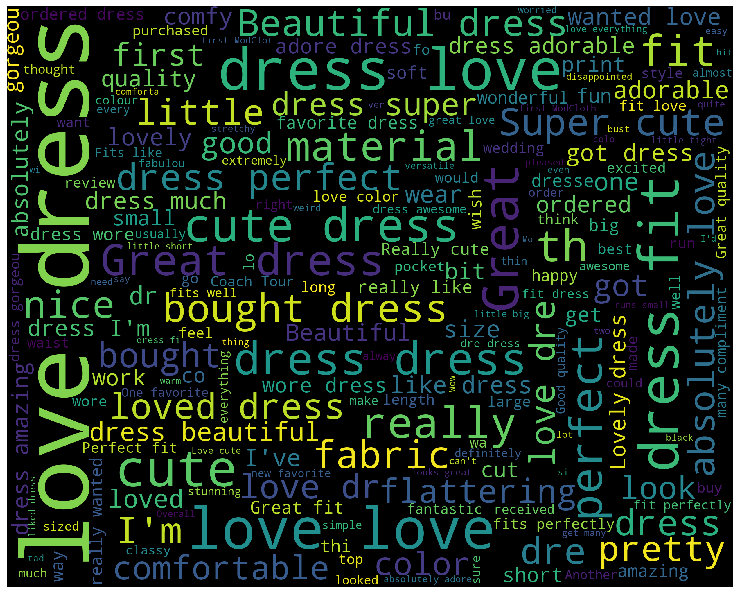

In [19]:
#lets check using wordcloud what people say for a particular item category dresses
A=cat_review[cat_review['category']=='dresses']
C=A['review_summary'].astype(str)

#Creating wordcloud

wordcloud_draw(C,'black')

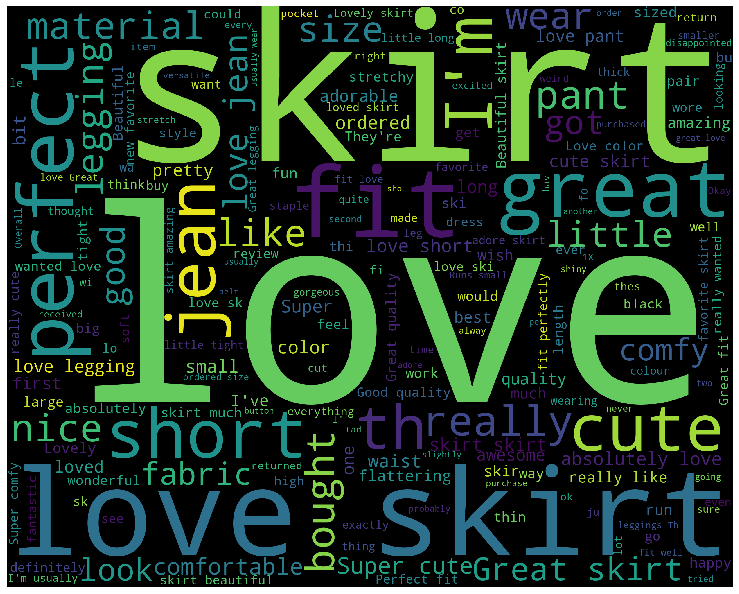

In [20]:
#lets check using wordcloud what people say for a particular item category bottoms
A=cat_review[cat_review['category']=='bottoms']
C=A['review_summary'].astype(str)

#Creating wordcloud

wordcloud_draw(C,'black')

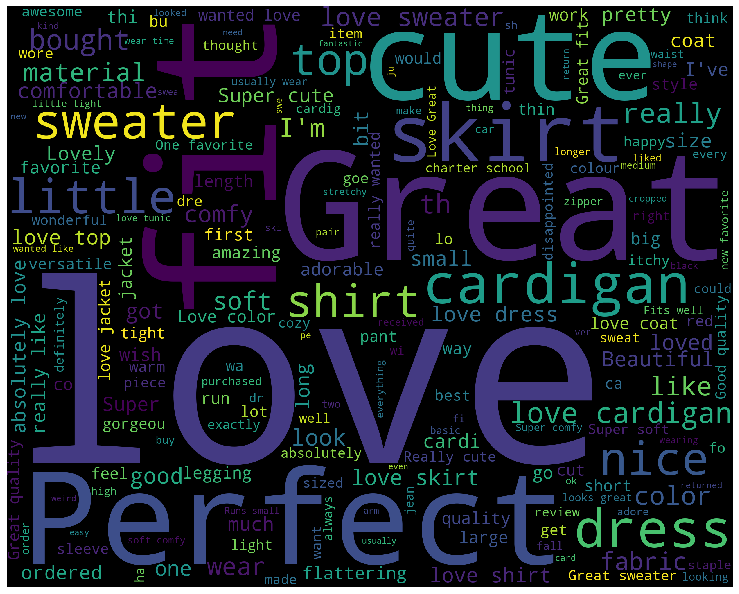

In [21]:
#lets check using wordcloud what people say for a particular item category bottoms
A=cat_review[cat_review['category']=='new']
C=A['review_summary'].astype(str)

#Creating wordcloud

wordcloud_draw(C,'black')

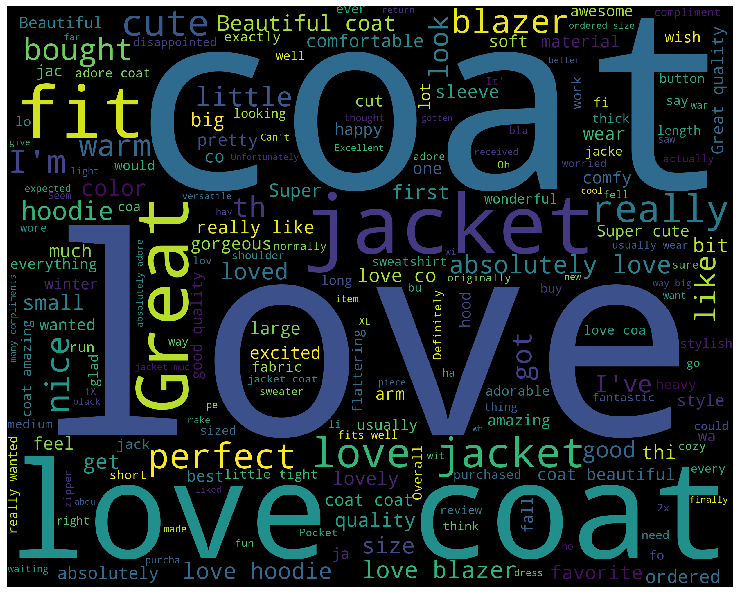

In [22]:
#lets check using wordcloud what people say for a particular item category bottoms
A=cat_review[cat_review['category']=='outerwear']
C=A['review_summary'].astype(str)

#Creating wordcloud

wordcloud_draw(C,'black')

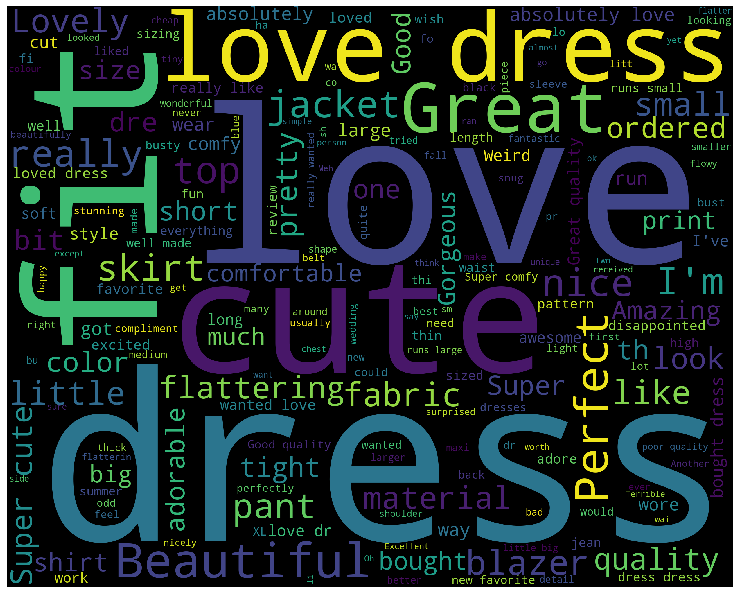

In [23]:
#lets check using wordcloud what people say for a particular item category sale
A=cat_review[cat_review['category']=='sale']
C=A['review_summary'].astype(str)

#Creating wordcloud

wordcloud_draw(C,'black')

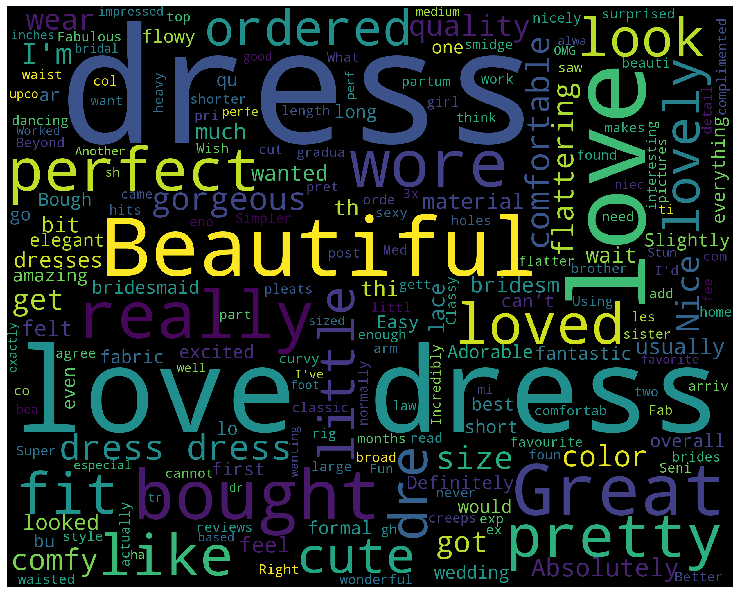

In [24]:
##lets check using wordcloud what people say for a particular item category dresses
A=cat_review[cat_review['category']=='wedding']
C=A['review_summary'].astype(str)

#Creating wordcloud

wordcloud_draw(C,'black')

In [75]:
#Category vs feedback ?
cat_fit=df1[['category','fit']]
cat_fit.dropna(inplace=True)
A=cat_fit.groupby('category')
A=A['fit'].value_counts()
A

category   fit  
bottoms    fit      10660
           small     2548
           large     2058
dresses    fit      13574
           large     2562
           small     2514
new        fit      14423
           small     4087
           large     2978
outerwear  fit       2793
           large      816
           small      614
sale       fit       1590
           small      500
           large      434
tops       fit      13498
           large     4168
           small     2698
wedding    fit        219
           large       43
           small       13
Name: fit, dtype: int64

In [76]:
#Function for visualisation
def plot_barh(df,col, cmap = None, stacked=False, norm = None):
    df.plot(kind='barh', colormap=cmap, stacked=stacked)
    fig = plt.gcf()
    fig.set_size_inches(24,12)
    plt.title("Category vs {}-feedback -  cloth {}".format(col, '(Normalized)' if norm else ''), fontsize= 20)
    plt.ylabel('Category', fontsize = 18)
    plot = plt.xlabel('Frequency', fontsize=18)


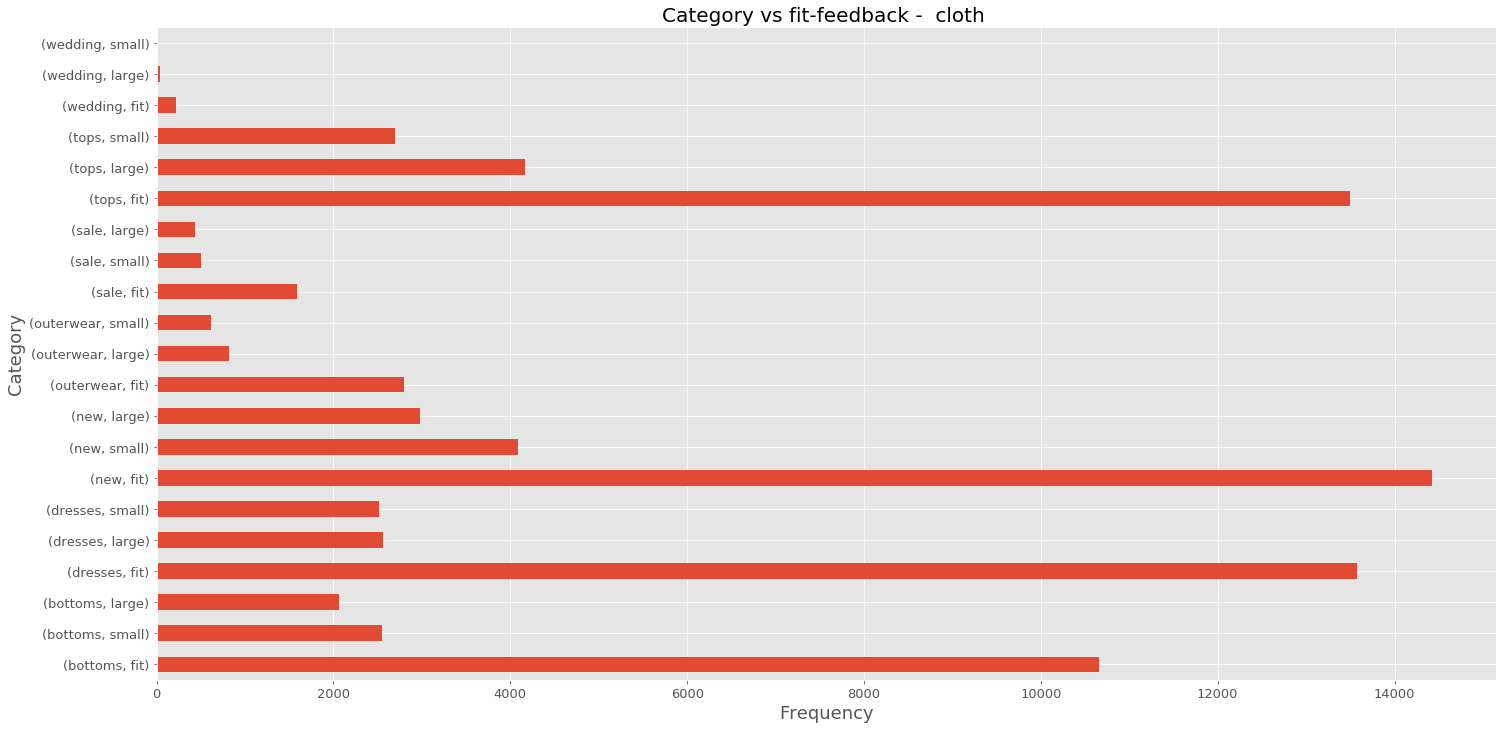

In [77]:
#Calling the function
plot_barh(A,'fit', cmap = None, stacked=False, norm = None)

In [71]:
#Length vs feedback !
len_size=df1[['length','fit']]
A=len_size.groupby('length')
A=A['fit'].value_counts()
A

length          fit  
just right      fit      45612
                small     8783
                large     7549
slightly long   fit       6219
                large     3768
                small     1274
slightly short  fit       3691
                small     2153
                large      475
very long       large     1211
                fit        942
                small      275
very short      small      474
                fit        277
                large       52
Name: fit, dtype: int64

In [72]:
#Function for visualisation
def plot_barh(df,col, cmap = None, stacked=False, norm = None):
    df.plot(kind='barh', colormap=cmap, stacked=stacked)
    fig = plt.gcf()
    fig.set_size_inches(24,12)
    plt.title("length vs {}-feedback -  cloth {}".format(col, '(Normalized)' if norm else ''), fontsize= 20)
    plt.ylabel('length', fontsize = 18)
    plot = plt.xlabel('Frequency', fontsize=18)


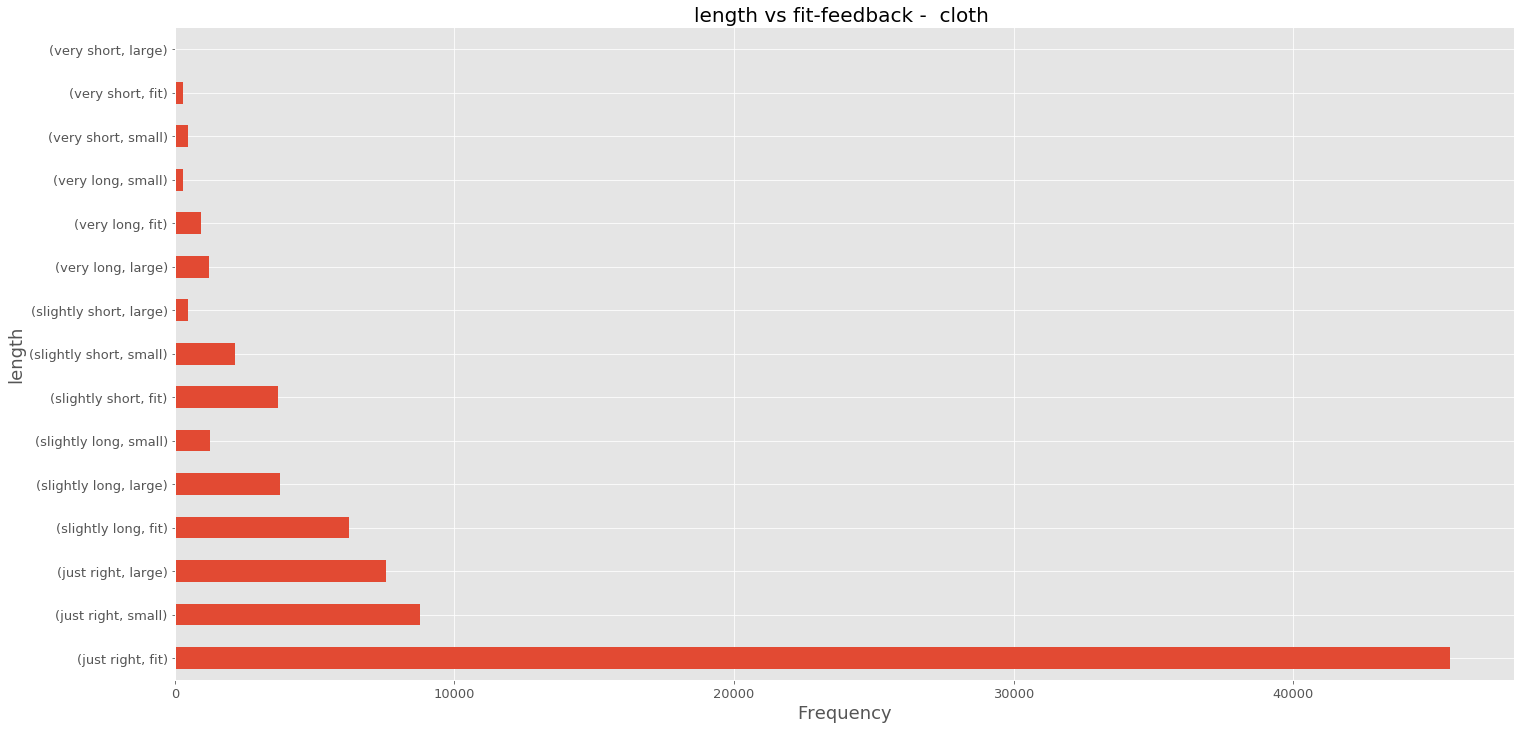

In [74]:
#Calling the function
plot_barh(A,'fit', cmap = None, stacked=False, norm = None)

In [80]:
#Category vs Quality
cat_qual=df1[['category','quality']]
A=cat_qual.groupby('category')
A=A['quality'].value_counts()
A

category   quality
bottoms    5.00       5597
           4.00       4908
           3.00       3613
           2.00        903
           1.00        230
dresses    5.00       6919
           4.00       6401
           3.00       4045
           2.00       1031
           1.00        240
new        5.00       7012
           4.00       6988
           3.00       5462
           2.00       1633
           1.00        386
outerwear  5.00       1684
           4.00       1383
           3.00        845
           2.00        233
           1.00         76
sale       5.00       1009
           4.00        781
           3.00        509
           2.00        148
           1.00         63
tops       5.00       7239
           4.00       6576
           3.00       5010
           2.00       1174
           1.00        349
wedding    5.00        144
           4.00         81
           3.00         42
           2.00          8
Name: quality, dtype: int64

In [83]:
#Function for visualisation
def plot_barh(df,col, cmap = None, stacked=False, norm = None):
    df.plot(kind='barh', colormap=cmap, stacked=stacked)
    fig = plt.gcf()
    fig.set_size_inches(24,12)
    plt.title("Category vs {}-Quality -  cloth {}".format(col, '(Normalized)' if norm else ''), fontsize= 20)
    plt.ylabel('category,quality', fontsize = 18)
    plot = plt.xlabel('Frequency', fontsize=18)


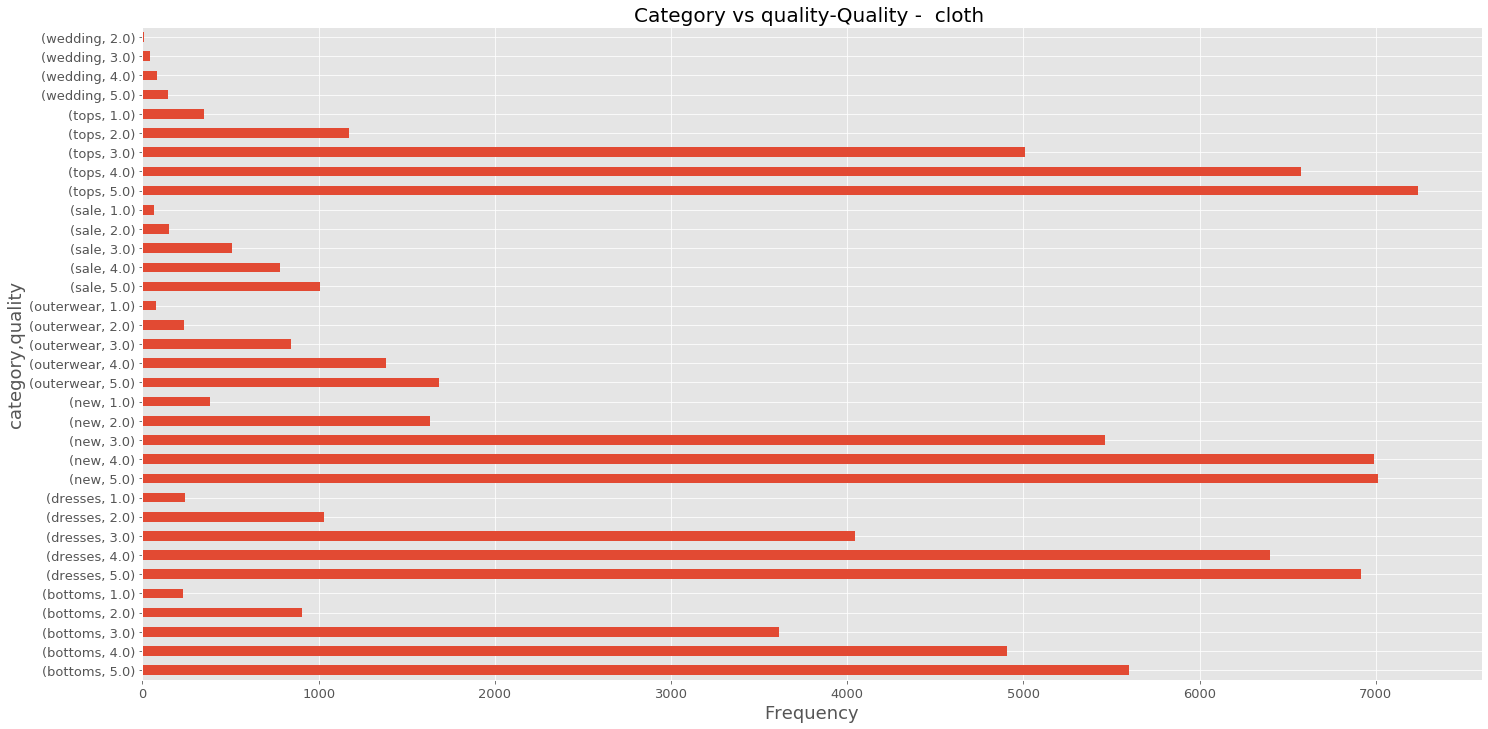

In [84]:
#Calling the function
plot_barh(A,'quality', cmap = None, stacked=False, norm = None)